In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
# Load dataset 
df = pd.read_csv("kidney_disease.csv")
col={'age': 'age',
     'bp': 'blood_pressure',
     'sg': 'specific_gravity',
     'al': 'albumin',
     'su': 'sugar',
     'rbc': 'red_blood_cells',
     'pc': 'pus_cell',
     'pcc': 'pus_cell_clumps',
     'ba': 'bacteria',
     'bgr': 'blood_glucose_random',
     'bu': 'blood_urea',
     'sc': 'serum_creatinine',
     'sod': 'sodium',
     'pot': 'potassium',
     'hemo': 'hemoglobin',
     'pcv': 'packed_cell_volume',
     'wc': 'white_blood_cell_count',
     'rc': 'red_blood_cell_count',
     'htn': 'hypertension',
     'dm': 'diabetes_mellitus',
     'cad': 'coronary_artery_disease',
     'appet': 'appetite',
     'pe': 'pedal_edema',
     'ane': 'anemia',
     'classification': 'class'}
df.rename(columns=col, inplace=True)

In [4]:
df.shape

(400, 26)

In [5]:
print(df.dtypes)

id                           int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
class                       object
dtype: object


In [6]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
# Convert specified columns to float64
columns_to_convert = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [8]:
# Adjusting object value
corrections = {
    'hypertension': {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'},
    'diabetes_mellitus': {' yes': 'yes', '\tno': 'no', '\tyes': 'yes'},
    'coronary_artery_disease': {'\tno': 'no'},
    'class': {'ckd\t': 'ckd'}
}

# Apply corrections
df.replace(corrections, inplace=True)

In [9]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [10]:
#Check for null value
df.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [11]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns using Iterative Imputer
df[numeric_columns] = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True).fit_transform(df[numeric_columns])

# Function to fill missing values with random sampling for specified features
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum(), random_state=0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

# Fill missing values in 'red_blood_cells' and 'pus_cell' using random sampling
for feature in ['red_blood_cells', 'pus_cell']:
    random_value_imputation(feature)

# Fill missing values in other categorical columns using the mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
#Checking for null value
df[categorical_columns].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [13]:
df[numeric_columns].isnull().sum()

id                        0
age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [14]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop(columns=['class'])
y = df['class']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=10) # Adjust number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Train-test split for PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Evaluate model
y_pred = logreg.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [16]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop(columns=['class'])  
y = df['class']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Train-test split for PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Evaluate model
y_pred = decision_tree.predict(X_test)
print("Decision Tree Classifier:\n", classification_report(y_test, y_pred))

# Train Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate model
y_pred = random_forest.predict(X_test)
print("Random Forest Classifier:\n", classification_report(y_test, y_pred))


Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.96      0.93      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [17]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop(columns=['class'])  # Replace 'class' with the name of the target column if different
y = df['class']  # Replace 'class' with the name of the target column if different

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=10)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Train-test split for PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Evaluate model
y_pred = random_forest.predict(X_test)
print("Random Forest Classifier:\n", classification_report(y_test, y_pred))

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.984375
Test Accuracy of KNN is 0.9875 

Confusion Matrix :- 
[[51  1]
 [ 0 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [20]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

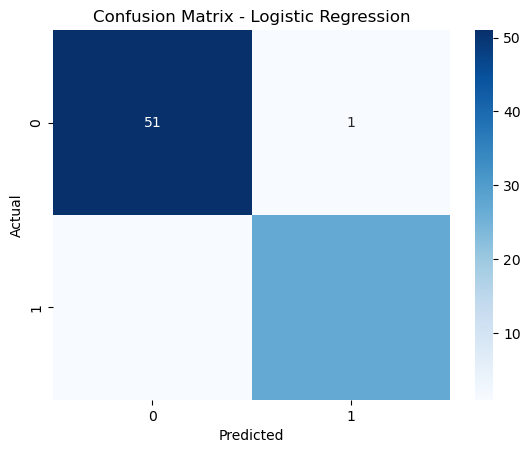

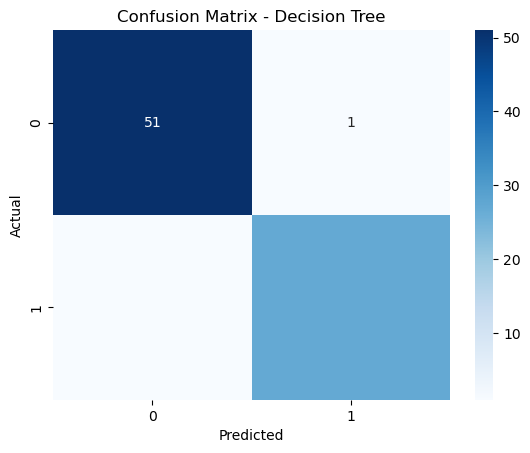

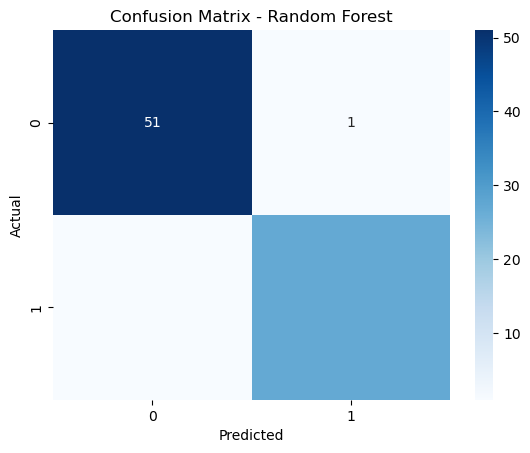

In [21]:
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Decision Tree")
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix - Random Forest")